# Import library

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Load Datasets

In [58]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

# Data Analysis

In [59]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [61]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [62]:
train.isna().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

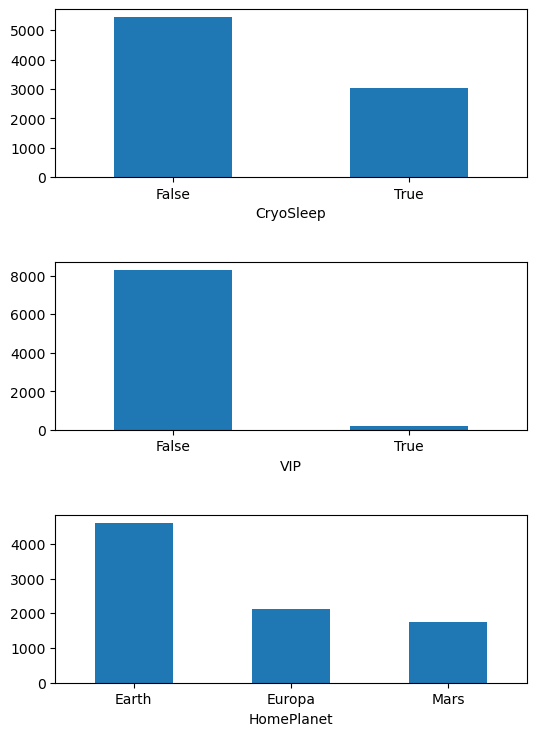

In [63]:
cols = ['CryoSleep', 'VIP', 'HomePlanet']

plt.figure(figsize=(6, 8))
for i, col in enumerate(cols):
    plt.subplot(len(cols), 1, i+1)
    train[col].value_counts().plot(kind='bar', rot=0)
    plt.tight_layout(pad=3)

([<matplotlib.patches.Wedge at 0x1ace2f9a7d0>,
 [Text(-0.012522008688130765, 1.0999287246446539, ''),
  Text(0.01252200868813063, -1.0999287246446539, '')],
 [Text(-0.006830186557162235, 0.5999611225334475, '50.4%'),
  Text(0.006830186557162161, -0.5999611225334475, '49.6%')])

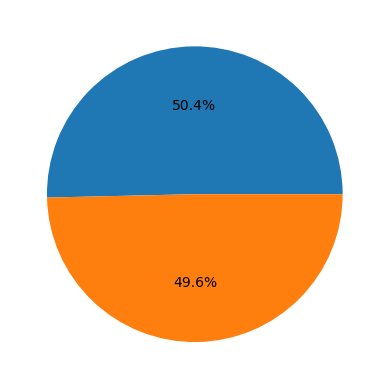

In [64]:
plt.pie(train['Transported'].value_counts(), autopct='%1.1f%%')

# Future Engineering

In [65]:
cols = [train, test]

In [66]:
for i in cols:
    i = i.drop(columns='Name', axis=1, inplace=True)

In [67]:
for i in cols:
    i = i['Age'].fillna(train['Age'].median(), inplace=True)

In [68]:
for i in cols:
    i[['deck', 'num', 'side']] = i['Cabin'].str.split('/', expand=True)

In [69]:
for i in cols:
    i[['group', 'member']] = i['PassengerId'].str.split('_', expand=True)

In [70]:
for i in cols:
    group_size = i.groupby('group').size()
    grouping = set(group_size[group_size > 1].index)
    i['is_solo'] = ~i['group'].isin(grouping)
    i['group_size'] = i['group'].map(group_size).fillna(0).astype(int)

In [71]:
for i in cols:
    i = i.drop(['Cabin', 'member', 'group'], axis=1, inplace=True)

In [72]:
cols = ['CryoSleep', 'VIP', 'Transported', 'is_solo']

for i in cols:
    train[i] = train[i].astype(bool)
    if i not in test.columns:
        continue
    test[i] = test[i].astype(bool)

train[cols] = train[cols].astype(int)
cols.remove('Transported')
test[cols] = test[cols].astype(int)

In [73]:
cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for i in cols:
    train[i].fillna(0, inplace=True)
    test[i].fillna(0, inplace=True)

cols.append('Age')
train[cols] = train[cols].astype(int)
test[cols] = test[cols].astype(int)

In [74]:
cols = ['HomePlanet', 'Destination', 'num', 'side', 'deck']

for i in cols:
    train[i].fillna(train[i].mode()[0], inplace=True)
    test[i].fillna(test[i].mode()[0], inplace=True)

In [75]:
cols = ['HomePlanet', 'Destination', 'side', 'num', 'deck']
le = preprocessing.LabelEncoder()

for i in cols:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

# Model Create

In [76]:
y = train['Transported']
train = train.drop(['Transported'], axis=1)

In [77]:
y.shape, train.shape, test.shape

((8693,), (8693, 16), (4277, 16))

In [78]:
X_train, X_test, y_train, y_test = train_test_split(train, y)

In [79]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6519, 16), (2174, 16), (6519,), (2174,))

#### RandomForestClassifier

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8012879484820608


#### GradientBoostingClassifier

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8100275988960441


#### LogisticRegression

In [82]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, max_iter=5000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7750689972401104


#### DecisionTreeClassifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7387304507819688


# Submission

In [84]:
pred = gb.predict(test)
smple_sub = pd.read_csv('./datasets/sample_submission.csv')
sub_df = pd.DataFrame({
    'PassengerId' : smple_sub['PassengerId'],
    'Transported' : pred
})
sub_df['Transported'] = sub_df['Transported'].astype('bool')

sub_df.to_csv('submission.csv', index=False)